# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setups
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
        

Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 : albany
Processing Record 2 of Set 1 : avarua
Processing Record 3 of Set 1 : pisco
Processing Record 4 of Set 1 : hobart
Processing Record 5 of Set 1 : haines junction
Processing Record 6 of Set 1 : busselton
Processing Record 7 of Set 1 : vaini
City not found. Skipping...
Processing Record 8 of Set 1 : ambilobe
Processing Record 9 of Set 1 : yellowknife
Processing Record 10 of Set 1 : cayenne
City not found. Skipping...
Processing Record 11 of Set 1 : lata
Processing Record 12 of Set 1 : rawson
Processing Record 13 of Set 1 : houma
Processing Record 14 of Set 1 : hoshcha
Processing Record 15 of Set 1 : kapaa
Processing Record 16 of Set 1 : bredasdorp
City not found. Skipping...
Processing Record 17 of Set 1 : hilo
Processing Record 18 of Set 1 : idrinskoye
City not found. Skipping...
Processing Record 19 of Set 1 : lebu
City not found. Skipping...
Processing Record 20 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [9]:
weather_dict.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat           537
Lng           537
Max Temp      537
Wind Speed    537
dtype: int64

In [16]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,63,US,1595450102,58,42.60,-73.97,87.01,1.66
1,Avarua,8,CK,1595449780,88,-21.21,-159.78,77.00,13.87
2,Pisco,0,PE,1595449787,72,-13.70,-76.22,68.00,6.93
3,Hobart,75,AU,1595449786,81,-42.88,147.33,42.80,8.05
4,Haines Junction,97,CA,1595449828,49,60.75,-137.51,63.81,5.66
...,...,...,...,...,...,...,...,...,...
532,Altamira,67,BR,1595450413,60,-3.20,-52.21,84.42,3.58
533,Caborca,79,MX,1595449886,44,30.58,-111.10,95.00,3.00
534,Fomboni,78,KM,1595450413,68,-12.28,43.74,75.63,15.28
535,Houlton,40,US,1595450413,39,46.13,-67.84,81.00,8.05


In [13]:
weather_dict.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

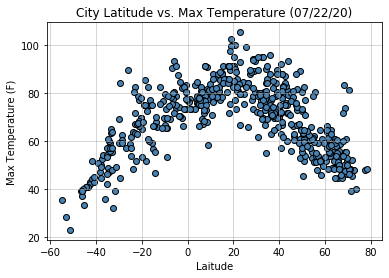

In [24]:
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (07/22/20)")

plt.xlabel("Laitude")

plt.ylabel("Max Temperature (F)")

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

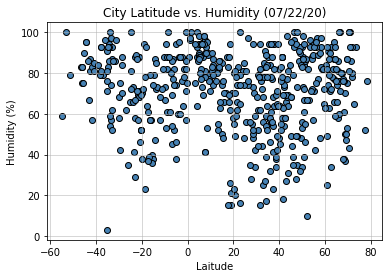

In [25]:
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")


plt.title("City Latitude vs. Humidity (07/22/20)")


plt.xlabel("Laitude")


plt.ylabel("Humidity (%)")


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

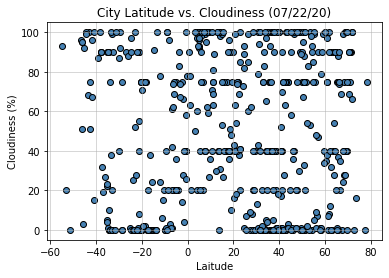

In [26]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (07/22/20)")

plt.xlabel("Laitude")

plt.ylabel("Cloudiness (%)")

plt.ylim(-5,105)

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

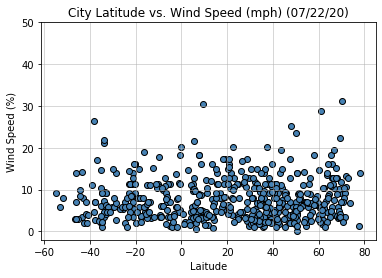

In [27]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (07/22/20)")

plt.xlabel("Laitude")

plt.ylabel("Wind Speed (%)")

plt.ylim(-2,50)

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [28]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [29]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.7


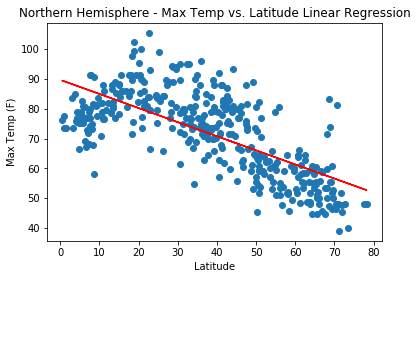

In [31]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.82


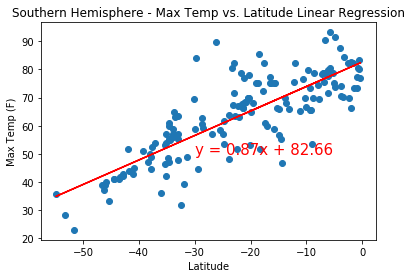

In [32]:
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

annotate(equation, -30, 50)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.04


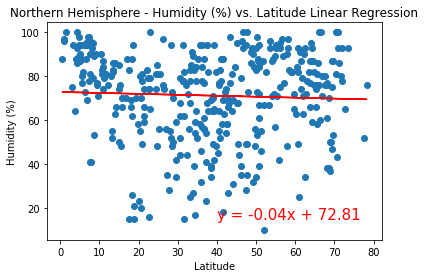

In [33]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

annotate(equation, 40, 15)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.17


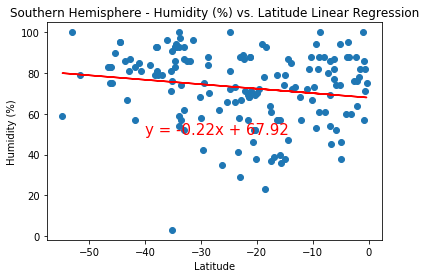

In [34]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

annotate(equation, -40, 50)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.15


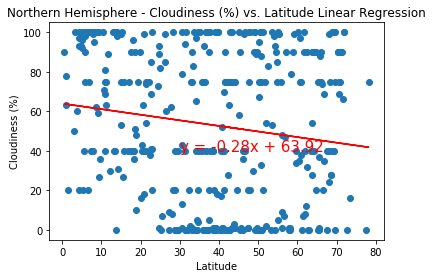

In [35]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

annotate(equation, 30, 40)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.17


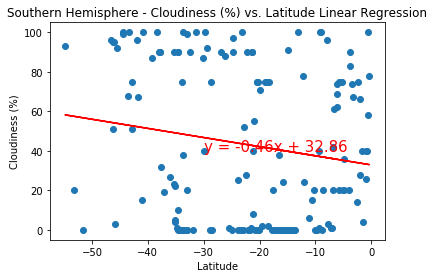

In [36]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

annotate(equation, -30, 40)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.05


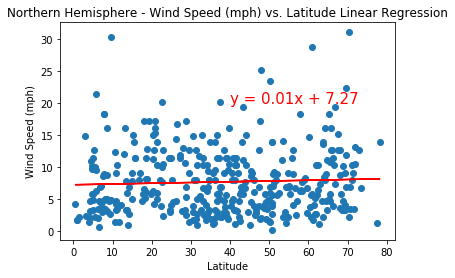

In [37]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

annotate(equation, 40, 20)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.04


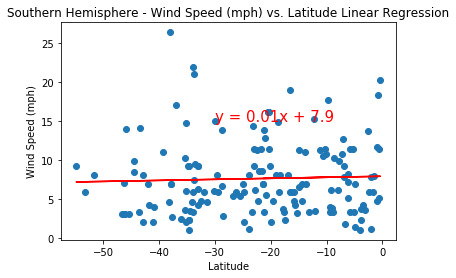

In [38]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

annotate(equation, -30, 15)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
